In [1]:


# # ######################################
# # # Get the SWG Ring 
# # ######################################


# import sys
# sys.path.append('/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/pymacros/pcells_EBeam_Beta')
# import pya
# from pya import *
# from SiEPIC.utils import get_technology_by_name
# from SiEPIC.utils.layout import make_pin,new_layout
# import siepic_ebeam_pdk
# cell, ly = new_layout("EBeam", "ring_res", GUI=True)  
# from SWG_Ring import SWG_Ring  
# from Waveguide_SWG import Waveguide_SWG
# from Waveguide_SWG_to_Strip import Waveguide_SWG_to_Strip
# import tempfile
# import os
# import gdsfactory as gf  
# from gdsfactory.typings import LayerSpec  
# from gdsfactory.technology import LayerMap  
# from gdsfactory.typings import Layer
# import numpy as np
# import math

# class lib(pya.Library):  
#     def __init__(self):  
#         tech = "EBeam"  
#         library = tech + "test_lib"  
#         self.technology = tech  
#         self.layout().register_pcell("SWG_Ring", SWG_Ring())  
#         self.register(library)  
        

# t = lib()  
# library = t.technology + "test_lib"  
  
# # Create the SWG Ring  
# #  Parameters:
# #       pitch  - grating period [um]
# #       w      - waveguide width [um]
# #       r      - ring radii [um]
# #       ff     - grating duty cycle (%)
# #       angle  - angle of the resonator (360 = full ring)
# #       gap2   - coupling gap [um]
# #       busL   - bus waveguide length [um]
# #       taperL - SWG <-> Strip Taper
# #    
# pcell = ly.create_cell("SWG_Ring", library, {  
#     "pitch": 0.50,  
#     "w": 0.5,  
#     "r": 30,  
#     "ff": 0.5,  
#     "gap2": 0.1,
#     "angle": 360
# })  
  
# inst = cell.insert(pya.CellInstArray(pcell.cell_index(), pya.Trans.R0))  
# # Save the layout to a temporary GDS file  
# with tempfile.NamedTemporaryFile(suffix='.gds', delete=False) as tmp:  
#     temp_gds_path = tmp.name  
#     ly.write(temp_gds_path)  
  
# # Import as gdsfactory Component  
# swg_ring_component = gf.import_gds(temp_gds_path, cellname=pcell.name) 
# os.unlink(temp_gds_path)


# # ######################################
# # # Get the SWG Waveguide (for the drop port) 
# # ###################################### 


# # class lib_waveguide(pya.Library):  
# #     def __init__(self):  
# #         tech = "EBeam"  
# #         library = tech + "test_lib"  
# #         self.technology = tech  
# #         self.layout().register_pcell("Waveguide_SWG_to_Strip", Waveguide_SWG())  
# #         self.register(library)  
        

# # t = lib_waveguide()  
# # library = t.technology + "test_lib"  
  
# # # Create the SWG Waveguide  
# # # Input: length, target_period, wg_width, width, duty


# # #  Input: 
# # # length, 
# # # period_strip, 
# # # period_swg, 
# # # wg_width_strip, 
# # # wg_width_swg, 
# # # duty_strip, 
# # # duty_swg
# # #     continuously (linearly) variable period, width, duty along the length
    
# # pcell = ly.create_cell("Waveguide_SWG_to_Strip", library, {  
# #     "length": 100,  
# #     "period_strip": 0.5,  
# #     "period_swg": 30,  
# #     "wg_width_strip": 100,  
# #     "wg_width_swg": 0.1 ,
    
# # })  
  
# # inst = cell.insert(pya.CellInstArray(pcell.cell_index(), pya.Trans.R0))  
# # # Save the layout to a temporary GDS file  
# # with tempfile.NamedTemporaryFile(suffix='.gds', delete=False) as tmp:  
# #     temp_gds_path = tmp.name  
# #     ly.write(temp_gds_path)  
    
    
# # swg_waveguide_component = gf.import_gds(temp_gds_path, cellname=pcell.name) 
 
    
    
  
# # # Now you can add it to your gdsfactory component  
# c = gf.Component()  
# ring = c << swg_ring_component  


# # output_wg.move((-150, 0))
# # # ring.move((-100,300))
  
# # # Clean up  

# # cell.show()


# @gf.cell  
# def swg_ring_double_bus(pitch: float = 2.0,  w: float = 0.5, ff: float = 0.5, angle: float = 360, gap2: float = 0.5, busL: float = 100, taperL: float = 5, r: float = 5,  layer: LayerSpec = LAYERS.SI) -> gf.Component:
#     c = gf.Component() 
    
    
#     pi = math.pi
    
#     # Minimize Ring Radii to 5 um
#     if r - w / 2 <= 0:
#         r = 5
    
#     # Bus waveguide should be longer than 2x*taperL + 10 um for coupling
#     if busL <= 10:
#         busL = taperL * 2 + 10
        
#     # Calculate number of SWG segments within the resonator
#     s1 = pitch * ff  # silicon
#     s2 = pitch - s1  # gap

#     ###################### Draw the Multi-box Ring

#     # Calculate a radius to fit all of the gratings
#     const = math.floor(2 * pi * r / (s1 + s2))
#     # if doesn't divide evenly, replace r with best possible r
#     if (2 * pi * r) % (s1 + s2) != 0:
#         r = const * (s1 + s2) / (2 * pi)
     
#     # Draw the SWGs
#     theta1 = math.atan(s1 / r)
#     theta2 = math.atan(s2 / r)
#     nSeg = int(
#         math.floor(angle / (math.degrees(theta1) + math.degrees(theta2)))
#     )  # NUmber of SWG segments

#     si_first = True  # for alternating between silicon and gap
#     j = 0  # Index of how many silicon thetas
#     jj = 0  # Index of how many gap thetas
#     ORDER = True  # Ordering of the coordinates for polygon drawing

#     xo = [(r - w / 2) * math.cos(0)]
#     yo = [(r - w / 2) * math.sin(0)]
#     xo.append((r + w / 2) * math.cos(0))
#     yo.append((r + w / 2) * math.sin(0))

#     for i in range(0, nSeg * 2):
#         if si_first:
#             j = j + 1
#             si_first = not (si_first)
#         else:
#             jj = jj + 1
#             si_first = not (si_first)

#         if ORDER:
#             xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
#             yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
#             xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
#             yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
#             ORDER = not (ORDER)
#         else:
#             xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
#             yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
#             xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
#             yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
#             ORDER = not (ORDER)

#         if len(xo) == 4:
#             points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um  
#             c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
#             xo = []  
#             yo = []  
#     r = r - w

#     # Draw the Bus Waveguides
#     const = math.floor(2 * pi * r / (s1 + s2))

#     # If doesn't divide evenly, replace r with best possible r
#     if (2 * pi * r) % (s1 + s2) != 0:
#         r = const * (s1 + s2) / (2 * pi)

#     # calulate ideal length of bus
#     bus_length = busL
#     constant = math.ceil(bus_length / (s1 + s2))
#     if bus_length % (s1 + s2) != 0:
#         bus_length = constant * (s1 + s2)

#     xo = [
#         (r + w / 2 + gap2),
#         (r + w / 2 + gap2 + w),
#         (r + w / 2 + gap2 + w),
#         (r + w / 2 + gap2),
#     ]
#     yo = [0, 0, s1, s1]
#     points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um 
#     c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
    
#     # draw the bus waveguide
#     for i in range(0, int(math.ceil((constant) / 2))):
#         yu = [yo[j] + i * pitch for j in range(len(yo))]
#         yd = [yo[j] - i * pitch for j in range(len(yo))]

#         # dpts = [pya.DPoint(xo[i], yu[i]) for i in range(len(xo))]
#         points = list(zip(xo, yu))  # Convert to list of (x, y) tuples in um 
#         c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
#         points = list(zip(xo, yd))  # Convert to list of (x, y) tuples in um 
#         c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling

#         # # dpolygon = DPolygon(dpts)
#         # # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#         # # shapes(LayerSiN).insert(element)
#         # dpts = [pya.DPoint(xo[i], yd[i]) for i in range(len(xo))]
#         # dpolygon = DPolygon(dpts)
#         # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#         # shapes(LayerSiN).insert(element)

#     # draw the tapers from waveguide to SWG
#     xtu = [
#         ((r + w / 2 + gap2) + (w - 0.06) / 2),
#         ((r + w / 2 + gap2) + (w - 0.06) / 2 + 0.06),
#         ((r + w / 2 + gap2) + w),
#         (r + w / 2 + gap2),
#     ]
#     ytu = [(yu[3] - taperL), (yu[3] - taperL), (yu[3]), (yu[3])]
#     # dpts = [pya.DPoint(xtu[i], ytu[i]) for i in range(len(xtu))]
#     # dpolygon = DPolygon(dpts)
#     # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#     # shapes(LayerSiN).insert(element)
    
#     points = list(zip(xtu, ytu))  # Convert to list of (x, y) tuples in um 
#     c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling

#     ytd = [(yd[1] + taperL), (yd[1] + taperL), (yd[1]), (yd[1])]
#     # dpts = [pya.DPoint(xtu[i], ytd[i]) for i in range(len(xtu))]
#     points = list(zip(xtu, ytd))  # Convert to list of (x, y) tuples in um 
#     c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
#     # dpolygon = DPolygon(dpts)
#     # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#     # shapes(LayerSiN).insert(element)

#     # Bus Strip Waveguide
#     xTu = [min(xtu), min(xtu), min(xtu) + w, min(xtu) + w]
#     yTu = [max(ytu), round(max(ytu) + busL), round(max(ytu) + busL), max(ytu)]

#     # dpts = [pya.DPoint(xTu[i], yTu[i]) for i in range(len(xtu))]
#     points = list(zip(xTu, yTu))  # Convert to list of (x, y) tuples in um 
#     c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
#     # dpolygon = DPolygon(dpts)
#     # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#     # shapes(LayerSiN).insert(element)

#     yTd = [min(ytd), round(min(ytd) - busL), round(min(ytd) - busL), min(ytd)]

#     # dpts = [pya.DPoint(xTu[i], yTd[i]) for i in range(len(xtu))]
#     points = list(zip(xTu, yTd))  # Convert to list of (x, y) tuples in um 
#     c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
#     # dpolygon = DPolygon(dpts)
#     # element = Polygon.from_dpoly(dpolygon * (1.0 / dbu))
#     # shapes(LayerSiN).insert(element)

#     # DEV BOX
#     # half_l = (self.cell.bbox().width() - (w) / dbu - gap2 / dbu) / 2
#     # half_r = self.cell.bbox().width() - half_l
#     # dev = Box(-half_l, max(yTu) / dbu, half_r, min(yTd) / dbu)
#     # shapes(LayerDevRecN).insert(dev)
#     # dev_width = self.cell.bbox().width() / 2

#     # # Create the pins on the waveguides, as short paths:

#     # bus_length = to_itype(bus_length / 2, dbu)

#     # # Pin1
#     # x_pin = max(xTu) - w / 2
#     # y_pin = max(yTu)
#     # make_pin(self.cell, "opt1", [x_pin, y_pin], w, LayerPinRecN, 90)


#     # # Pin2
#     # x_pin = max(xTu) - w / 2
#     # y_pin = min(yTd)
#     # make_pin(self.cell, "opt2", [x_pin, y_pin], w, LayerPinRecN, 270)
    
#     c = gf.add_pins.add_bbox(  
#         c,  
#         bbox_layer=LAYERS.DEVREC,  
#         left=gap2 / 2,   # adjust margins as needed  
#         right=gap2 / 2,  
#         top=0.5,  
#         bottom=0.5,  
#     )  
#     # Option 2: Manual polygon (if you need exact coordinates)  
#     # half_l = (c.bbox().width() - w - gap2) / 2  
#     # half_r = c.bbox().width() - half_l  
#     # c.add_polygon([(-half_l, max(yTu)), (half_r, max(yTu)),  
#     #                (half_r, min(yTd)), (-half_l, min(yTd))],  
#     #               layer=devrec_layer)  
  
#     # Pins as ports (optical ports)  
#     c.add_port(  
#         name="opt1",  
#         center=(max(xTu) - w / 2, max(yTu)),  
#         width=w,  
#         orientation=90,  
#         layer=LAYERS.SI,          # pin marker layer  
#     )  
#     c.add_port(  
#         name="opt2",  
#         center=(max(xTu) - w / 2, min(yTd)),  
#         width=w,  
#         orientation=270,  
#         layer=LAYERS.SI,          # pin marker layer  
#     )  
  
#     # Optional: add visual pin markers (e.g., triangles or squares)  
#     c = gf.add_pins.add_pins_container(c, layer=LAYERS.PINREC, layer_label=LAYERS.TEXT) 
    
#     return c



# openEBL Design Submissions

- The Silicon Electronic Photonics Integrated Circuits (SiEPIC) fabrication program, <a href="https://siepic.ca/fabrication/">SiEPICfab</a>, presents the open electron beam lithography (EBL) fabrication process, where former and current students of <a href="https://siepic.ca/education/">SiEPIC</a> workshops and courses can submit their design for manufacturing and testing.
- More details about <a href="https://siepic.ca/openEBL/">openEBL</a>.
- **Submission deadline: 07:00 UTC February 14, 2026.**
- The previous submission was in [October 2025](https://github.com/SiEPIC/openEBL-2025-10). You can look at previous designs for inspiration.

# Fabrication process: Passive Silicon
## Technical summary:
- SOI wafer, 220 nm silicon
- Baseline process:
  - Single full etch, using a negative resist (HSQ)
  - Oxide cladding
- Process Design Kit: [SiEPIC-EBeam-PDK](https://github.com/siepic/SiEPIC_EBeam_PDK)
- Chip fabrication by [Applied Nanotools](https://www.appliednt.com/nanosoi-fabrication-service/)

## Layer table
| Name            | Layer/datatype | Description                                                                          |
|-----------------|----------------|--------------------------------------------------------------------------------------|
| Si  | 1/0 | [Fabricated] Layer to draw silicon geometries |
| Floorplan | 99/0 | [Virtual] Marks the layout design area |
| Text | 10/0 | [Virtual] Text labels for automated measurements |
| DevRec | 68/0 | [Virtual] Device recognition layer for component connectivity, netlist extraction, and verification|
| PinRec  | 1/10  | [Virtual] Port/pins recognition layer for component connectivity, netlist extraction, and verification|
| Waveguide | 1/99 | [Virtual] Guiding shape for waveguide, used for length calculation |
| SEM | 200/0 | [Virtual] Requests for SEM images. Rectangles in a 4:3 aspect ratio |


# Submission instructions:

The submission involves several steps. First, you need to create your design(s) using the process design kit (PDK) for this specific fabrication run. Then you need to create a Fork of this repository, commit your design(s), ensure that it passes the checks, and create a pull request. Once your pull request is approved, your design(s) will be merged into the layout for fabrication. You should verify that your design is correctly merged. Once the designs are fabricated, they will be tested, and the measurement results will be posted in this repository.

## Design software and PDK installation instructions:
 - Design tools and process design kit (SiEPIC-EBeam-PDK, KLayout implementation)<a href="https://github.com/siepic/SiEPIC_EBeam_PDK/wiki/Installation-instructions"> installation instructions</a>.
 - Create your design using Python ([example Jupyter notebook](https://colab.research.google.com/drive/1q3PU5ESmOa171J6KOkiUUlVXPnPBuCg-?usp=sharing), [example Python file](https://github.com/SiEPIC/openEBL-2024-10/blob/main/submissions/KLayout%20Python/EBeam_LukasChrostowski_MZI.py)) or using the Graphical Interface in KLayout

## Submission via GitHub
 - [Watch this video for a demonstration](https://kaltura.clemson.edu/media/t/1_iwysnxub)
 - Create an account on GitHub
 - Fork a copy of the SiEPIC-Tools GitHub repository: [https://github.com/SiEPIC/SiEPIC-Tools](https://github.com/SiEPIC/SiEPIC-Tools/fork). Return here.
 - Fork a copy of this GitHub repository into your own account:  <a href="../../fork">Create a new fork</a>.
 - Turn on the GitHub Actions on your forked repository: <a href="../../actions">Actions</a> (In your repository's page on GitHub, click on Actions in the top-menu bar, and Enable the workflows).
 - [Optional] Install GitHub Desktop (or git) on your computer, and Clone a local copy: <a href="x-github-client://openRepo/https://github.com/SiEPIC/openEBL-2026-02">Open with GitHub Desktop</a>
 - Create your design, and ensure that the filename contains your <a href="https://www.edx.org/learn/engineering/university-of-british-columbia-silicon-photonics-design-fabrication-and-data-ana">edX.org</a> (or GitHub username if the edX one is a random string that does not contain your name), and be formatted according to the course/workshop as follows:
   - EBeam_username.oas: for the <a href="https://www.edx.org/learn/engineering/university-of-british-columbia-silicon-photonics-design-fabrication-and-data-ana">edX Phot1x silicon photonics design course</a>
   - ELEC413_username.oas: for the <a href="https://ece.ubc.ca/courses/elec-413/">UBC ELEC 413 course</a>
   - SiEPIC_Passives_username.oas: for the <a href="https://fabricinnovation.ca/workshop-passive-silicon-photonics-fabrication-2024">CMC SiEPIC Passives silicon photonics workshop</a>
   - openEBL_username.gds: for past participants in the above courses, conference short courses
   - For example: EBeam_LukasChrostowski_rings.oas
 - Ensure that your fork is up to date with the main SiEPIC repository.  Click "Sync fork" <img width="671" alt="image" src="https://github.com/SiEPIC/openEBL-2024-05/assets/15843200/256c87dc-dd68-4606-8529-6c7f6ecf41fa">
 - Upload your design(s) into the "submissions" folder, as a binary file, namely a .gds (GDSII format) or .oas (OASIS format) file. 
    - This can be done via the GitHub web page, by navigating to the <a href=../../tree/main/submissions>submissions folder</a>, then clicking on Add file, and Upload files. 
    - Click Commit changes, and wait for the verification (via GitHub actions) to complete. This will appear as a green checkmark or red X next to your commit on GitHub. 
    - If there are errors, please review and correct the errors.
    - Please run your verification locally (press V in KLayout), or download the output .lydrb verification file from GitHub and open in KLayout.
 -  Look for errors -- "All checks have failed" <img width="864" alt="image" src="https://github.com/SiEPIC/openEBL-2024-05/assets/15843200/d5689514-eca0-423f-9288-b20ec4fdd5e9">
    - Click on Details
    - In the main, window expand the "Run layout verification"; see if there is a text description of the problem
    - Look for the Artifact file; download it and open it in KLayout
  - After fixing the errors, you should have a green check mark as follows: <img width="488" alt="image" src="https://github.com/SiEPIC/openEBL-2024-05/assets/15843200/4c502cc4-16c1-4115-8ad7-7d5fdfe715d3">   
- Alternatively upload your Python file, which will be compiled by a GitHub Action.  
   - For KLayout designs, use the "submissions/KLayout Python" folder, namely a .py (Python format) file.  e.g., EBeam_LukasChrostowski_MZI.py.  The Python file should save a gds or oas file into the parent "submissions" folder. The Python script needs to be executable in non-GUI mode, namely using "import klayout SiEPIC SiEPIC-EBeam-PDK"
 - Create a <a href="https://help.github.com/articles/using-pull-requests/">Pull Request</a> -- this will notify the team of your contribution, which we can aggregate into the main design file
 - Return to the main repository, and ensure that your design is correctly merged. Download the Latest Merge file, below.

<img width="1281" alt="image" src="https://github.com/SiEPIC/openEBL-2024-02/assets/15843200/e4785a27-b971-4a64-8796-1e351f30c00e">

## Black-box cells (IP Replacement)
- We perform IP replacement on several cells (grating couplers). We call these cells Black Box (BB), and you can identify them by _BB in the cell name, or the presence of the Blackbox layer 998/0 in the cell.
- You must not change the name of the cell, the contents, nor cell origins. Otherwise, the replacement will not work correctly.

## FYI – Automated GitHub Actions
The verification and merging is performed using GitHub actions. The repository implements the following:
1) Running the Python files in the "submissions/KLayout Python" folder, to generate the designs
2) Performing Manufacturing DRC verification on the designs in the "submissions" folder, and outputing the errors as an Artifact
3) Performing Functional verification on the designs in the "submissions" folder, and outputing the errors as an Artifact
4) Merging the designs from the "submissions" folder, and outputing merged layout as an Artifact in the main repository


## Measurement data
Will be added here.

## SEM images of the fabricated designs

Will be added here.

## Merged Layout File

<img alt="Merged Layout" src="./merge/EBeam.png">

Click on the following link to download the EBeam.oas merged layout file:
<!-- start-link -->
https://github.com/SiEPIC/openEBL-2026-02/actions/runs/21769707326/artifacts/5413601066
<!-- end-link -->

## DRC Below

```tcl

# Basic DRC deck for SiEPIC_EBeam_PDK
# Lukas Chrostowski, 2016
# Mustafa Hammood, 2020 update
# Lukas Chrostowski, 2023 update

# Read about DRC scripts in the User Manual under "Design Rule Check (DRC)"
# http://klayout.de/doc/manual/drc_basic.html

# Added SiN based on publication: https://doi.org/10.1117/12.2650447

source($input, $input.top_cell)

report("SiEPIC-EBeam-PDK DRC", $output)

# Layers:
LayerSi=input(1,0)
#LayerSip6nm=input(31,0)
#LayerSi_rib=input(2,0)
LayerSiN = input(4,0)
DevRec=input(68,0)
PinRec=input(1,10)
LayerFP=input(99)
LayerM1=input(11,0)
LayerM2=input(12,0)
LayerMLOpen=input(13,0)
LayerDeepTrench=input(201,0)
#LayerVC=input(40,0)
#LayerN=input(20,0)
#LayerNpp=input(24,0)

#################
# non-physical checks
#################

# Check device overlaps (functional check)
overlaps = DevRec.merged(2)
output(overlaps, "Devices","Devices cannot be overlapping")

# make sure the devices are within the floor plan layer region;
LayerSi.outside(LayerFP).output("Boundary","devices are out of boundary")
LayerSiN.outside(LayerFP).output("Boundary","devices are out of boundary")

#################
# physical checks
#################

tol = 1e-3  # users typically shoot for exactly the min features
            # for curves, this leads to lots of false errors.

# minimum feature size of Si is 70 nm and minimum exclusion between Si is 70 nm
LayerSi.width(0.07-tol, angle_limit(80)).output("Si_width","Si minimum feature size violation; min 60 nm")
#LayerSip6nm.width(0.07-tol, angle_limit(80)).output("Sip6nm_width","Si minimum feature size violation; min 60 nm")
LayerSi.space(0.07-tol, angle_limit(80)).output("Si_space","Si minimum space violation; min 60 nm")
#LayerSip6nm.space(0.07-tol, angle_limit(80)).output("Sip6nm_space","Si minimum space violation; min 60 nm")

# minimum feature size of SiN is 120 nm and minimum exclusion between Si is 120 nm
LayerSiN.width(0.12-tol, angle_limit(80)).output("SiN_width","SiN minimum feature size violation; min 120 nm")
LayerSiN.space(0.12-tol, angle_limit(80)).output("SiN_space","SiN minimum space violation; min 120 nm")

# minimum feature size of Si rib is 100 nm and minimum exclusion between Si is 60 nm
#LayerSi_rib.width(0.1-tol, angle_limit(80)).output("Si_rib_width","Si_rib minimum feature size violation; min 100 nm")

# Metal rules based on the metalization process provided by Applied Nanotools, based on contact optical lithography.
# Metal heater, M1
LayerM1.width(3.0-tol, angle_limit(70)).output("M1_width","M1 minimum feature size violation; min 3 µm")
LayerM1.space(3.0-tol).output("M1_space","M1 minimum space violation; min 3 µm")

# Metal routing/contact, M2
LayerM2.width(5.0-tol, angle_limit(70)).output("M2_width","M2 minimum feature size violation; min 5 µm")
LayerM2.space(8.0-tol).output("M2_space","M2 minimum space violation; min 8 µm")

# Metal pad air opening, MLOpen
LayerMLOpen.width(10.0-tol).output("MLOpen_width","MLOpen minimum feature size violation; min 10 µm")
LayerMLOpen.space(10.0-tol).output("MLOpen_space","MLOpen minimum space violation; min 10 µm")

# Doping rules based on the experimental process
# Oxide contact vias
#LayerVC.width(5.0-tol, angle_limit(70)).output("VC_width","VC minimum feature size violation; min 5 µm")
#LayerVC.space(5.0-tol).output("VC_space","VC minimum space violation; min 5 µm")

# NPP Doping
#LayerNpp.width(2.0-tol, angle_limit(70)).output("Npp_width","Npp Doping minimum feature size violation; min 2 µm")
#LayerNpp.space(2.0-tol).output("Npp_space","Npp minimum space violation; min 2 µm")

# N Doping
#LayerN.width(2.0-tol, angle_limit(70)).output("N_width","N Doping minimum feature size violation; min 2 µm")
#LayerN.space(2.0-tol).output("N_space","N minimum space violation; min 2 µm")

# minimum separation between NPP and Si
#LayerNpp.separation(LayerSi, 2.0-tol).output("Npp_Si_separation","Npp-Si minimum separation violation; min 2 µm")

# minimum separation between VC and Si
#LayerVC.separation(LayerSi, 3.0-tol).output("VC_Si_separation","VC-Si minimum separation violation; min 3 µm")

# minimum overlap rules:
LayerM2.overlap(LayerM1,3.0-tol).output("M2_M1_overlap","M2 minimum overlap with M1 violation; min 3 µm")
#LayerM2.overlap(LayerVC, 5.0-tol).output("M2_VC_overlap","Metal2-VC minimum overlap violation; min 5 µm")
#LayerN.overlap(LayerNpp, 3.0-tol).output("N_Npp_overlap","N-Npp minimum overlap violation; min 3 µm")
#LayerVC.overlap(LayerNpp, 5.0-tol).output("VC_Npp_overlap","VC-Npp minimum overlap violation; min 5 µm")

# minimum inclusion rules:
#LayerM2.enclosing(LayerVC, 1.0-tol).output("M2_VC_enclosure","M2-VC minimum enclosure violation; min 1 µm")
#LayerSi_rib.enclosing(LayerVC, 1.0-tol).output("Si_rib_VC_enclosure","Si_rib-VC minimum enclosure violation; min 1 µm")


# Waveguide checks:
# disconnects, mismatched

PinRec.not_inside(LayerSi).and(PinRec.not_inside(LayerSiN))
    .output( "SiEPIC-1a" , "Warning: Possible waveguide mismatch or waveguide disconnect: PinRec must enclose only one waveguide material." )

LayerDeepTrench.separation(LayerM2, 20.0-tol).output("DT_Metal_separation","DT-Metal minimum separation violation; min 20 µm")



In [2]:
# /home/matthew/photonics562/
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_adiabatic_te1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_adiabatic_tm1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_bdc_te1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_crossing4.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_gc_te1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_gc_tm1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_routing_taper_te1550_w=500nm_to_w=3000nm_L=40um.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_routing_taper_te1550_w=500nm_to_w=3000nm_L=20um.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_splitter_swg_assist_te1310.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_splitter_swg_assist_te1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_terminator_te1310.gds
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_terminator_te1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_terminator_tm1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_y_1310.gds
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_y_1550.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_y_adiabatic_500pin.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_y_adiabatic.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/GCs_BB.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/taper_si_simm_1310.gds 
# Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/taper_si_simm_1550.gds

## Setup

In [3]:


import gdsfactory as gf  
from gdsfactory.typings import LayerSpec  
from gdsfactory.technology import LayerMap  
from gdsfactory.typings import Layer



#####################
# Clear
#####################
gf.clear_cache()




#####################
# PDK / LAYERS / DRC
#####################

class OpenEBL_Layers(LayerMap):  
    """Custom layer mapping for your PDK."""  
    # Fabricated layers  
    SI: Layer = (1, 0)  # Silicon geometries  
    # Virtual layers    
    FLOORPLAN: Layer = (99, 0)  # Layout design area  
    TEXT: Layer = (10, 0)  # Text labels  
    DEVREC: Layer = (68, 0)  # Device recognition  
    PINREC: Layer = (1, 10)  # Port/pins recognition  
    WAVEGUIDE: Layer = (1, 99)  # Waveguide guiding shape  
    SEM: Layer = (200, 0)  # SEM image requests  LAYERS = OpenEBL_Layers

OPENEBL_PDK = gf.Pdk(  
    name="openEBL",  
    layers=OpenEBL_Layers,  
)  

LAYERS = OpenEBL_Layers

# DRC constants for SiEPIC_EBeam_PDK  
MIN_SI_FEATURE = 0.07  # 70 nm minimum Si feature size  
MIN_SI_SPACE = 0.07    # 70 nm minimum Si spacing  


gf.gpdk.PDK.activate()

#####################
# New Cells
#####################
@gf.cell  
def straight_waveguide(length: float = 100.0,  width: float = 0.5,  layer: LayerSpec =LAYERS.SI, pre='') -> gf.Component:  
    """Create DRC-compliant straight waveguide.  
      
    Args:  
        length: Waveguide length (um)  
        width: Waveguide width (um) - must be >= 0.07 for DRC  
        layer: Layer specification  
    """  
    # DRC validation  
    if width < MIN_SI_FEATURE:  
        raise ValueError(f"Waveguide width {width} below minimum {MIN_SI_FEATURE}")  
      
    c = gf.Component()  
    c.add_polygon([  
        (0, -width/2),   
        (length, -width/2),   
        (length, width/2),   
        (0, width/2)  
    ], layer=layer)  
      
    # Add ports  
    c.add_port(name=pre + "o1", center=(0, 0), width=width, orientation=180, layer=layer)  
    c.add_port(name=pre + "o2", center=(length, 0), width=width, orientation=0, layer=layer)  
    
    
    gf.add_pins.add_pins(  
        c,  
        port_type="optical",  
        function=gf.add_pins.add_pin_rectangle_inside,  
        layer=LAYERS.PINREC,          # pin marker layer  
        layer_label=LAYERS.TEXT,  # text labels on (10, 0)  
        pin_length=0.1,  
    )  
    gf.add_pins.add_outline(c, layer=LAYERS.DEVREC)
      
    return c  


#####################
# Get External Components
#####################


# gc gds
gc_gds = "/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_gc_te1550.gds"
gc_component = gf.import_gds(gc_gds, cellname="ebeam_gc_te1550", rename_duplicated_cells=True)


# 4 crossing
crossing_gds = "/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_crossing4.gds"
crossing_component = gf.import_gds(crossing_gds, cellname="ebeam_crossing4", rename_duplicated_cells=True)





#####################
# Add ports
##################### 

 

gc_component = gf.add_ports.add_ports_from_markers_center(
    gc_component,
    pin_layer=LAYERS.PINREC,
    port_layer=LAYERS.SI,
    # inside=True
)
gc_component.remove_layers(layers=[LAYERS.PINREC, LAYERS.DEVREC], recursive=True)  #

        
crossing_component.ports = []  

crossing_component = gf.add_ports.add_ports_from_markers_center(  
    crossing_component,  
    pin_layer=LAYERS.PINREC,             # layer with small rectangles  
    port_layer=LAYERS.SI,             # silicon layer  

)  

crossing_component.remove_layers(layers=[LAYERS.PINREC, LAYERS.DEVREC], recursive=True)  # ← This was already correct  


    

def inspect_component(name, component):
    print(f'\n{name} SPECS')
    component.pprint_ports()
    print('straight waveguide layers', component.layers)
    for l in component.layers:
        print('Straight Waveguide polygons', component.get_polygons(layers=[l]))
    for l in component.layers:
        labels = component.get_labels(layer=l) 
        for label in labels:
            print(f'label {l}: ', label.string, label.x, label.y)
        


inspect_component("Straight Waveguide",straight_waveguide())
inspect_component("Grating Coupler", gc_component)
inspect_component("Crossing", crossing_component)
        




#####################
# Create the device
#####################        
        
        
        
# Create the device
c = gf.Component()

# add the sub subcomponents
wg_bottom_left = c << straight_waveguide(pre='bl')
wg_top_right = c << straight_waveguide(pre='tr')
wg_bottom_right = c << straight_waveguide(pre='br')
wg_top_left = c << straight_waveguide(pre='tl')
gc_bottom_left = c << gc_component
gc_top_right = c << gc_component
gc_bottom_right = c << gc_component
gc_top_left = c << gc_component




# translate everything

#wgs
wg_top_right.move((150, 50))
wg_top_left.move((0, 50))
wg_bottom_right.move((150,0))
wg_bottom_left.move((0,0))

#gcs
gc_top_right.move((300, 50))
gc_top_right.rotate(180, (300, 50))
gc_top_left.move((-100, 50))
gc_bottom_right.move((300,0))
gc_bottom_right.rotate(180,(300,0) )
gc_bottom_left.move((-100,0))


xing = c << crossing_component
xing.move((125,25))



# connect everything





###########################
# ROUTING 
###########################
# print(f"Distance between ports: {d}")

# Define a simple cross-section on your SI layer  
xs = gf.cross_section.cross_section(layer=LAYERS.SI, width=0.5, radius=10.0)  
  
# Connect waveguides to crossing ports (choose appropriate sides)  
gf.routing.route_single(c, wg_bottom_left.ports['blo2'], xing['o4'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_top_left.ports['tlo2'], xing['o1'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_bottom_right.ports['bro1'], xing['o3'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_top_right.ports['tro1'], xing['o2'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
  
# Connect opposite waveguide ends to grating couplers  
gf.routing.route_single(c, wg_bottom_left.ports['blo1'], gc_bottom_left['o1'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_top_left.ports['tlo1'], gc_top_left['o1'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_bottom_right.ports['bro2'], gc_bottom_right['o1'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)  
gf.routing.route_single(c, wg_top_right.ports['tro2'], gc_top_right['o1'], cross_section=xs,start_straight_length=0.0, end_straight_length=0.0)











  



Straight Waveguide SPECS


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center       ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG (1/0) │ (0.0, 0.0)   │ optical   │
│ o2   │ 0.5   │ 0.0         │ WG (1/0) │ (100.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴──────────┴──────────────┴───────────┘

straight waveguide layers [(1, 0), (68, 0), (1, 10), (10, 0)]
Straight Waveguide polygons {1: [(0,-250;0,250;100000,250;100000,-250) props={}]}
Straight Waveguide polygons {33: [(0,-250;0,250;100000,250;100000,-250) props={}]}
Straight Waveguide polygons {36: [(0,-250;0,250;100,250;100,-250) props={}, (99900,-250;99900,250;100000,250;100000,-250) props={}]}
Straight Waveguide polygons {48: []}
label (10, 0):  o1 0.0 0.0
label (10, 0):  o2 100.0 0.0

Grating Coupler SPECS


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center     ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.5   │ 0.0         │ WG (1/0) │ (0.0, 0.0) │ optical   │
└──────┴───────┴─────────────┴──────────┴────────────┴───────────┘

straight waveguide layers [(1, 0), (10, 0), (998, 0), (81, 0)]
Straight Waveguide polygons {1: [(-1,-1;-1,1;1,1;1,-1) props={}, (-17556,-5704;-17584,-5592;-17598,-5535;-17612,-5479;-17626,-5422;-17639,-5366;-17653,-5310;-17666,-5253;-17679,-5197;-17692,-5140;-17705,-5084;-17718,-5027;-17730,-4970;-17743,-4914;-17755,-4857;-17767,-4801;-17791,-4687;-17803,-4631;-17814,-4574;-17826,-4517;-17837,-4461;-17881,-4233;-17891,-4177;-17902,-4120;-17952,-3835;-17961,-3779;-17971,-3722;-18016,-3437;-18024,-3380;-18033,-3323;-18065,-3094;-18072,-3037;-18080,-2980;-18087,-2923;-18095,-2866;-18109,-2752;-18115,-2694;-18129,-2580;-18165,-2237;-18170,-2180;-18176,-2122;-18195,-1905;-18201,-1836;-18209,-1721;-18214,-1664;-18222,-1549;-18225,-1492;-18233,-1377;-18251,-1033;-18253,-976;-18256,-918;-18264,-689;-18265,-631;-18267,-574;-18273,-230;-18273,-172;-18274,-115;-18274,115;-18273,172;-18273,230;-18267,574;-18265,631;-18264,689;-18256,918;-18253,976;-18251,1033;-18233,1377;-18225,1492;-18222,1549;-1

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center      ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG (1/0) │ (-4.8, 0.0) │ optical   │
│ o2   │ 0.5   │ 90.0        │ WG (1/0) │ (0.0, 4.8)  │ optical   │
│ o3   │ 0.5   │ 0.0         │ WG (1/0) │ (4.8, 0.0)  │ optical   │
│ o4   │ 0.5   │ 270.0       │ WG (1/0) │ (0.0, -4.8) │ optical   │
└──────┴───────┴─────────────┴──────────┴─────────────┴───────────┘

straight waveguide layers [(1, 0), (10, 0)]
Straight Waveguide polygons {1: [(-250,-4800;-250,-3000;-460,-2750;-550,-2500;-590,-2250;-600,-2000;-600,-1750;-620,-1500;-720,-1000;-750,-740;-1000,-720;-1500,-620;-1750,-600;-2000,-600;-2250,-590;-2500,-550;-2750,-460;-3000,-250;-4800,-250;-4800,250;-3000,250;-2750,460;-2500,550;-2250,590;-2000,600;-1750,600;-1500,620;-1000,720;-750,740;-720,1000;-620,1500;-600,1750;-600,2000;-590,2250;-550,2500;-460,2750;-250,3000;-250,4800;250,4800;250,3000;460,2750;550,2500;590,2250;600,2000;600,1750;620,1500;720,1000;740,750;1000,720;1500,620;1750,600;2000,600;2250,590;2500,550;2750,460;3000,250;4800,250;4800,-250;3000,-250;2750,-460;2500,-550;2250,-590;2000,-600;1750,-600;1500,-620;1000,-720;740,-750;720,-1000;620,-1500;600,-1750;600,-2000;590,-2250;550,-2500;460,-2750;250,-3000;250,-4800) props={}]}
Straight Waveguide polygons {48: []}
label (10, 0):  Source: Wei Shi -4.0 -3.0


/home/matthew/photonics562/Photonics-Bootcamp/.venv/lib/python3.12/site-packages/gdsfactory/components/bends/bend_euler.py:110: UserWarning: {'width': 0.5} ignored for cross_section 'xs_f1c7673a'
  x = gf.get_cross_section(cross_section, width=width or x.width)


ManhattanRoute(backbone=[250000,50000, 300000,50000], start_port=Port(self.name='tro2', self.width=500, trans=r0 *1 250,50, layer=WG (1/0), port_type=optical), end_port=Port(self.name='o1', self.width=500, trans=r180 *1 300,50, layer=WG (1/0), port_type=optical), instances=[Unnamed_6: ports ['o1', 'o2'], KCell(name=straight_gdsfactorypcomponentspwaveguidespstraight_L50__1afba3ae, ports=['o1', 'o2'], pins=[], instances=[], locked=True, kcl=DEFAULT)], n_bend90=0, n_taper=0, bend90_radius=10000, taper_length=0, length_straights=50000, polygons={}, length_function=<function get_length_from_area.<locals>.get_length_ at 0x7aa8ef7ffe20>)

KLayout SiEPIC-Tools version 0.5.31
SiEPIC-Tools is up to date (0.5.31 vs 0.5.31).
Version check, time: 0.13039541244506836 seconds
SiEPIC-EBeam-PDK Python module: siepic_ebeam_pdk, KLayout technology: EBeam
SiEPIC-EBeam-PDK Python module: pymacros, v0.4.53
Libraries associated with Technology EBeam: ['EBeam', 'EBeam-ANT', 'EBeam-Dream', 'EBeam-SiN', 'EBeam_Beta']
Could not connect to klive server. Is klayout open and klive plugin installed?
2026-02-12 13:12:11.154 | WARNING  | kfactory.kcell:show:3958 - Could not connect to klive server


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

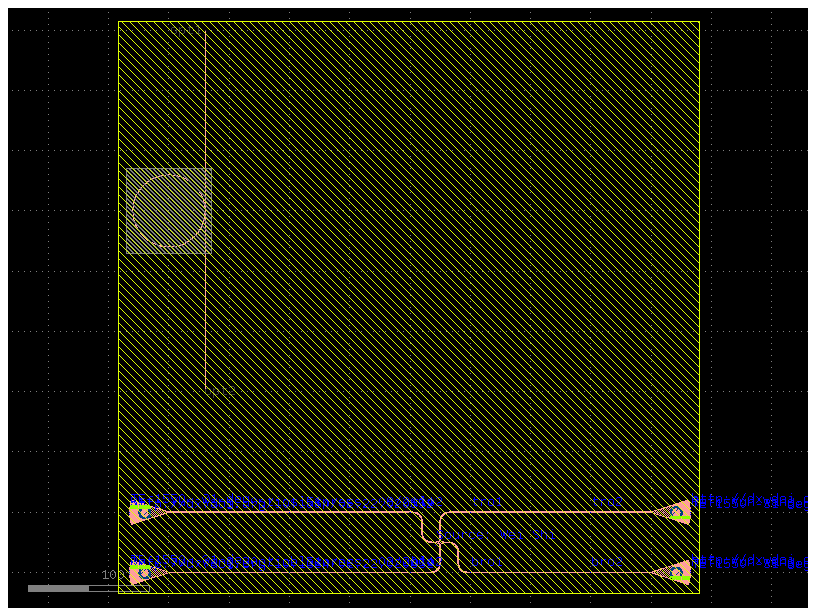

In [4]:
import sys
sys.path.append('/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/pymacros/pcells_EBeam_Beta')
import pya
from pya import *
from SiEPIC.utils import get_technology_by_name
from SiEPIC.utils.layout import make_pin,new_layout
import siepic_ebeam_pdk
cell, ly = new_layout("EBeam", "ring_res", GUI=True)  
from SWG_Ring import SWG_Ring  
import tempfile




class lib(pya.Library):  
    def __init__(self):  
        tech = "EBeam"  
        library = tech + "test_lib"  
        self.technology = tech  
        self.layout().register_pcell("SWG_Ring", SWG_Ring())  
        self.register(library)  
        

t = lib()  
library = t.technology + "test_lib"  
  
# Create the SWG Ring  
pcell = ly.create_cell("SWG_Ring", library, {  
    "pitch": 0.50,  
    "w": 0.5,  
    "r": 30,  
    "ff": 0.5,  
    "gap2": 0.1  
})  
  
inst = cell.insert(pya.CellInstArray(pcell.cell_index(), pya.Trans.R0))  
# Save the layout to a temporary GDS file  
with tempfile.NamedTemporaryFile(suffix='.gds', delete=False) as tmp:  
    temp_gds_path = tmp.name  
    ly.write(temp_gds_path)  
  
# Import as gdsfactory Component  
swg_component = gf.import_gds(temp_gds_path, cellname=pcell.name)  
  
# Now you can add it to your gdsfactory component  
# c = gf.Component()  
ring = c << swg_component  
ring.move((-100,300))
  
# Clean up  
# os.unlink(temp_gds_path)

cell.show()

gf.add_pins.add_bbox(  c,  bbox_layer=LAYERS.DEVREC, top=2, bottom=2,left=2,right=2) 
gf.add_pins.add_bbox(  c,  bbox_layer=LAYERS.FLOORPLAN, top=5, bottom=5,left=5,right=5) 
c.flatten()
# Export to GDS (without metadata for Calibre compatibility)  
c.write_gds("waveguide_with_gratings.gds", with_metadata=False)  
  
# Optional: Visualize the design  
c.plot()  

lyrdb = c.connectivity_check(port_types=("optical", "electrical"))  
filepath = gf.config.home / "errors.lyrdb"  
lyrdb.save(filepath)  
gf.show(c, lyrdb=filepath)


c.pprint_ports()


2026-02-12 13:36:38.488 | INFO     | kfactory.kcell:show:3995 - klive v0.4.1: Reloaded file '/tmp/interactiveshell_run_code.oas'


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

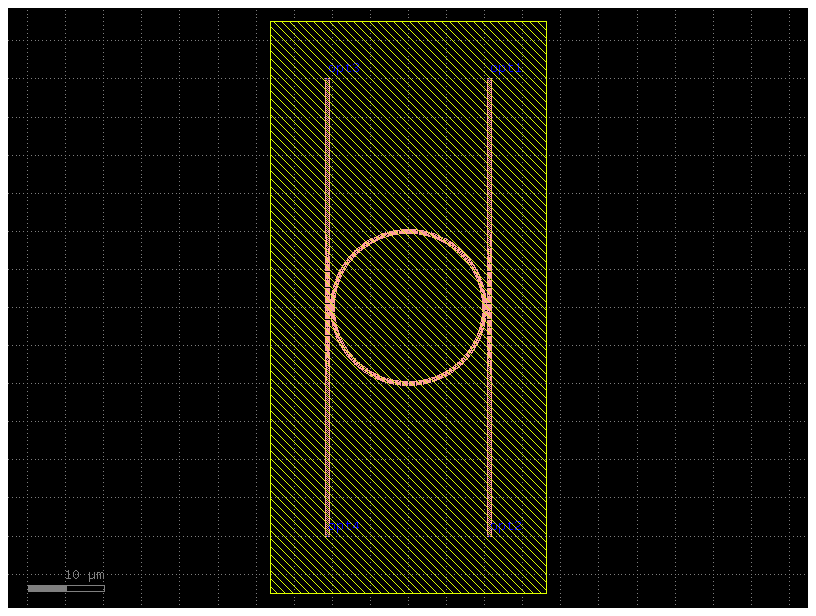

In [14]:

import sys
sys.path.append('/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/pymacros/pcells_EBeam_Beta')
# import pya
# from pya import *
# from SiEPIC.utils import get_technology_by_name
# from SiEPIC.utils.layout import make_pin,new_layout
# import siepic_ebeam_pdk
# cell, ly = new_layout("EBeam", "ring_res", GUI=True)  
# from SWG_Ring import SWG_Ring  
# from Waveguide_SWG import Waveguide_SWG
# from Waveguide_SWG_to_Strip import Waveguide_SWG_to_Strip
# import tempfile
# import os
import gdsfactory as gf  
from gdsfactory.typings import LayerSpec  
from gdsfactory.technology import LayerMap  
from gdsfactory.typings import Layer
import numpy as np
import math
from gdsfactory.snap import snap_to_grid  




#####################
# Clear
#####################
gf.clear_cache()


#####################
# PDK / LAYERS / DRC
#####################

class OpenEBL_Layers(LayerMap):  
    """Custom layer mapping for your PDK."""  
    # Fabricated layers  
    SI: Layer = (1, 0)  # Silicon geometries  
    # Virtual layers    
    FLOORPLAN: Layer = (99, 0)  # Layout design area  
    TEXT: Layer = (10, 0)  # Text labels  
    DEVREC: Layer = (68, 0)  # Device recognition  
    PINREC: Layer = (1, 10)  # Port/pins recognition  
    WAVEGUIDE: Layer = (1, 99)  # Waveguide guiding shape  
    SEM: Layer = (200, 0)  # SEM image requests  LAYERS = OpenEBL_Layers

OPENEBL_PDK = gf.Pdk(  
    name="openEBL",  
    layers=OpenEBL_Layers,  
)  

LAYERS = OpenEBL_Layers

# DRC constants for SiEPIC_EBeam_PDK  
MIN_SI_FEATURE = 0.07  # 70 nm minimum Si feature size  
MIN_SI_SPACE = 0.07    # 70 nm minimum Si spacing  


gf.gpdk.PDK.activate()


#####################
# New Cells
#####################

 # Instantiate the Pcell Parameters
# pitch  SWG Period [um]
# w  Waveguide Width [um]
# r  Ring Radii [um]
# ff SWG Duty Cycle [%]
# angle Angle of the ring
# gap2 Coupling Gap [um]
# busL Bus Length [um]
# taperL Taper Length [um]


period = 0.3
g = 0.640



@gf.cell  
def swg_ring_double_bus(pitch: float = period,  w: float = 0.5, ff: float = 0.5, angle: float = 360, gap2: float = g, taperL: float = 5, r: float = 10,  layer: LayerSpec = LAYERS.SI) -> gf.Component:
    c = gf.Component() 
    
    
    pi = math.pi
    
    # Minimize Ring Radii to 5 um
    if r - w / 2 <= 0:
        r = 5
    
    # Bus waveguide should be longer than 2x*taperL + 10 um for coupling
  
    busL = taperL * 2 + 10
        
    # Calculate number of SWG segments within the resonator
    s1 = pitch * ff  # silicon
    s2 = pitch - s1  # gap

    ####### Draw the Multi-box Ring

    # Calculate a radius to fit all of the gratings
    const = math.floor(2 * pi * r / (s1 + s2))
    # if doesn't divide evenly, replace r with best possible r
    if (2 * pi * r) % (s1 + s2) != 0:
        r = const * (s1 + s2) / (2 * pi)
     
    # Draw the SWGs
    theta1 = math.atan(s1 / r)
    theta2 = math.atan(s2 / r)
    nSeg = int(
        math.floor(angle / (math.degrees(theta1) + math.degrees(theta2)))
    )  # NUmber of SWG segments

    si_first = True  # for alternating between silicon and gap
    j = 0  # Index of how many silicon thetas
    jj = 0  # Index of how many gap thetas
    ORDER = True  # Ordering of the coordinates for polygon drawing

    xo = [(r - w / 2) * math.cos(0)]
    yo = [(r - w / 2) * math.sin(0)]
    xo.append((r + w / 2) * math.cos(0))
    yo.append((r + w / 2) * math.sin(0))

    for i in range(0, nSeg * 2):
        if si_first:
            j = j + 1
            si_first = not (si_first)
        else:
            jj = jj + 1
            si_first = not (si_first)

        if ORDER:
            xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
            xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
            ORDER = not (ORDER)
        else:
            xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
            xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
            ORDER = not (ORDER)

        if len(xo) == 4:
            points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um  
            c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
            xo = []  
            yo = []  
    r = r - w

    # Draw the Bus Waveguides
    const = math.floor(2 * pi * r / (s1 + s2))

    # If doesn't divide evenly, replace r with best possible r
    if (2 * pi * r) % (s1 + s2) != 0:
        r = const * (s1 + s2) / (2 * pi)

    # calulate ideal length of bus
    bus_length = busL
    constant = math.ceil(bus_length / (s1 + s2))
    if bus_length % (s1 + s2) != 0:
        bus_length = constant * (s1 + s2)

    xo = [
        (r + w / 2 + gap2),
        (r + w / 2 + gap2 + w),
        (r + w / 2 + gap2 + w),
        (r + w / 2 + gap2),
    ]
    yo = [0, 0, s1, s1]
    points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
    
    # draw the bus waveguide
    for i in range(0, int(math.ceil((constant) / 2))):
        yu = [yo[j] + i * pitch for j in range(len(yo))]
        yd = [yo[j] - i * pitch for j in range(len(yo))]

        points = list(zip(xo, yu))  # Convert to list of (x, y) tuples in um 
        points_mirrored = [(-x, y) for x, y in points] 
        c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
        c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
        points = list(zip(xo, yd))  # Convert to list of (x, y) tuples in um 
        points_mirrored = [(-x, y) for x, y in points] 
        c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
        c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
        
   
     

    # draw the tapers from waveguide to SWG
    xtu = [
        ((r + w / 2 + gap2) + (w - 0.06) / 2),
        ((r + w / 2 + gap2) + (w - 0.06) / 2 + 0.06),
        ((r + w / 2 + gap2) + w),
        (r + w / 2 + gap2),
    ]
    ytu = [(yu[3] - taperL), (yu[3] - taperL), (yu[3]), (yu[3])]
  
    
    points = list(zip(xtu, ytu))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling

    ytd = [(yd[1] + taperL), (yd[1] + taperL), (yd[1]), (yd[1])]
    points = list(zip(xtu, ytd))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling


    # Bus Strip Waveguide
    xTu = [min(xtu), min(xtu), min(xtu) + w, min(xtu) + w]
    yTu = [max(ytu), round(max(ytu) + busL), round(max(ytu) + busL), max(ytu)]

    points = list(zip(xTu, yTu))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
 

    yTd = [min(ytd), round(min(ytd) - busL), round(min(ytd) - busL), min(ytd)]

    points = list(zip(xTu, yTd))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
 
    
    c = gf.add_pins.add_bbox(  
        c,  
        bbox_layer=LAYERS.DEVREC,  
        left=gap2 / 2,   # adjust margins as needed  
        right=gap2 / 2,  
        top=0.5,  
        bottom=0.5,  
    )  

    c.add_port(  
        name="opt1",  
        center=(max(xTu) - w / 2, max(yTu)),  
        width=snap_to_grid(w),  
        orientation=90,  
        layer=LAYERS.SI,          # pin marker layer  
    )  
    c.add_port(  
        name="opt2",  
        center=(max(xTu) - w / 2, min(yTd)),  
        width=snap_to_grid(w),  
        orientation=270,  
        layer=LAYERS.SI,          # pin marker layer  
    )
    
    # Add ports for mirrored bus  
    c.add_port(  
        name="opt3",  
        center=(-max(xTu) + w / 2, max(yTu)),  
        width=snap_to_grid(w),  
        orientation=90,  
        layer=LAYERS.SI,  
    )  
    c.add_port(  
        name="opt4",   
        center=(-max(xTu) + w / 2, min(yTd)),  
        width=snap_to_grid(w),    
        orientation=270,  
        layer=LAYERS.SI,  
    )  
  
    # Optional: add visual pin markers (e.g., triangles or squares)  
    c = gf.add_pins.add_pins_container(c, layer=LAYERS.PINREC, layer_label=LAYERS.TEXT) 
    
    return c


gc_gds = "/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_gc_te1550.gds"
gc_component = gf.import_gds(gc_gds, cellname="ebeam_gc_te1550", rename_duplicated_cells=True)

gc_component = gf.add_ports.add_ports_from_markers_center(
    gc_component,
    pin_layer=LAYERS.PINREC,
    port_layer=LAYERS.SI,
    # inside=True
)
gc_component.remove_layers(layers=[LAYERS.PINREC, LAYERS.DEVREC], recursive=True)  


c = gf.Component()

ring = c << swg_ring_double_bus()




gf.add_pins.add_bbox(  c,  bbox_layer=LAYERS.DEVREC, top=2, bottom=2,left=2,right=2) 
gf.add_pins.add_bbox(  c,  bbox_layer=LAYERS.FLOORPLAN, top=5, bottom=5,left=5,right=5) 
c.flatten()
# Export to GDS (without metadata for Calibre compatibility)

file_name =  f"double_bus_ring_test_p{int(period*1e3)}_g{int(g*1e3)}.gds" 
c.write_gds(file_name, with_metadata=False)  
  
# Optional: Visualize the design  
c.plot()  

lyrdb = c.connectivity_check(port_types=("optical", "electrical"))  
filepath = gf.config.home / "errors.lyrdb"  
lyrdb.save(filepath)  
gf.show(c, lyrdb=filepath)


c.pprint_ports()






/home/matthew/photonics562/Photonics-Bootcamp/.venv/lib/python3.12/site-packages/gdsfactory/components/bends/bend_euler.py:110: UserWarning: {'width': 0.5} ignored for cross_section 'xs_f1c7673a'
  x = gf.get_cross_section(cross_section, width=width or x.width)


2026-02-12 13:12:12.613 | WARNING  | kfactory.kcell:show:3958 - Could not connect to klive server


┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer ┃ center ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
└──────┴───────┴─────────────┴───────┴────────┴───────────┘

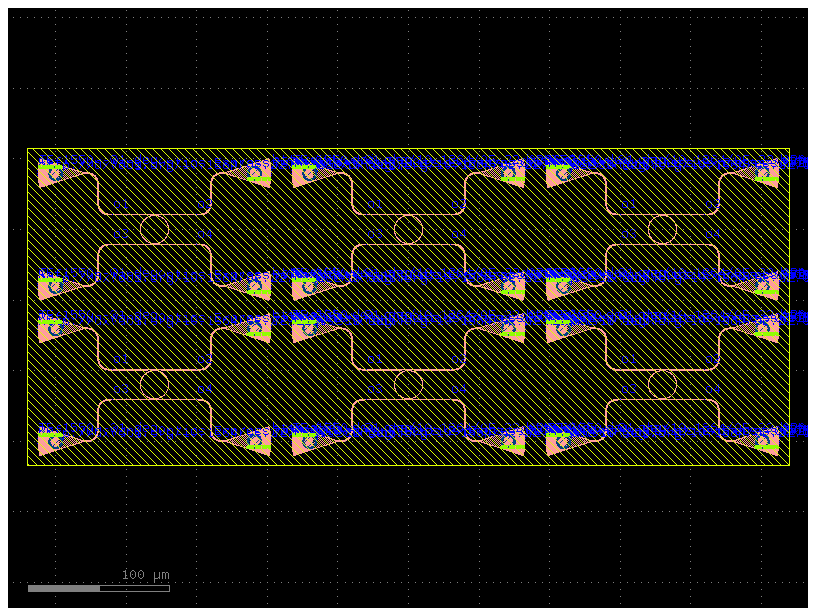

In [6]:
########### For open EBL submission ##############

import sys
sys.path.append('/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/pymacros/pcells_EBeam_Beta')
# import pya
# from pya import *
# from SiEPIC.utils import get_technology_by_name
# from SiEPIC.utils.layout import make_pin,new_layout
# import siepic_ebeam_pdk
# cell, ly = new_layout("EBeam", "ring_res", GUI=True)  
# from SWG_Ring import SWG_Ring  
# from Waveguide_SWG import Waveguide_SWG
# from Waveguide_SWG_to_Strip import Waveguide_SWG_to_Strip
# import tempfile
# import os
import gdsfactory as gf  
from gdsfactory.typings import LayerSpec  
from gdsfactory.technology import LayerMap  
from gdsfactory.typings import Layer
import numpy as np
import math



#####################
# Clear
#####################
gf.clear_cache()


#####################
# PDK / LAYERS / DRC
#####################

class OpenEBL_Layers(LayerMap):  
    """Custom layer mapping for your PDK."""  
    # Fabricated layers  
    SI: Layer = (1, 0)  # Silicon geometries  
    # Virtual layers    
    FLOORPLAN: Layer = (99, 0)  # Layout design area  
    TEXT: Layer = (10, 0)  # Text labels  
    DEVREC: Layer = (68, 0)  # Device recognition  
    PINREC: Layer = (1, 10)  # Port/pins recognition  
    WAVEGUIDE: Layer = (1, 99)  # Waveguide guiding shape  
    SEM: Layer = (200, 0)  # SEM image requests  LAYERS = OpenEBL_Layers

OPENEBL_PDK = gf.Pdk(  
    name="openEBL",  
    layers=OpenEBL_Layers,  
)  

LAYERS = OpenEBL_Layers

# DRC constants for SiEPIC_EBeam_PDK  
MIN_SI_FEATURE = 0.07  # 70 nm minimum Si feature size  
MIN_SI_SPACE = 0.07    # 70 nm minimum Si spacing  


gf.gpdk.PDK.activate()


#####################
# New Cells
#####################

 # Instantiate the Pcell Parameters
# pitch  SWG Period [um]
# w  Waveguide Width [um]
# r  Ring Radii [um]
# ff SWG Duty Cycle [%]
# angle Angle of the ring
# gap2 Coupling Gap [um]
# busL Bus Length [um]
# taperL Taper Length [um]

gc_gds = "/home/matthew/photonics562/Photonics-Bootcamp/SiEPIC_EBeam_PDK/klayout/EBeam/gds/EBeam/ebeam_gc_te1550.gds"
gc_component = gf.import_gds(gc_gds, cellname="ebeam_gc_te1550", rename_duplicated_cells=True)
gc_component = gf.add_ports.add_ports_from_markers_center(
        gc_component,
        pin_layer=LAYERS.PINREC,
        port_layer=LAYERS.SI,
        # inside=True
    )
gc_component.remove_layers(layers=[LAYERS.PINREC, LAYERS.DEVREC], recursive=True)   
    
@gf.cell  
def swg_ring_double_bus(pitch: float = 0.2,  w: float = 0.5, ff: float = 0.5, angle: float = 360, gap2: float = 0.6, taperL: float = 5, r: float = 10,  layer: LayerSpec = LAYERS.SI, x_center: float = 0, y_center: float = 0) -> gf.Component:
    c = gf.Component() 
    
    
    pi = math.pi
    
    # Minimize Ring Radii to 5 um
    if r - w / 2 <= 0:
        r = 5
    
    # Bus waveguide should be longer than 2x*taperL + 10 um for coupling
  
    busL = taperL * 2 + 10
        
    # Calculate number of SWG segments within the resonator
    s1 = pitch * ff  # silicon
    s2 = pitch - s1  # gap

    ####### Draw the Multi-box Ring

    # Calculate a radius to fit all of the gratings
    const = math.floor(2 * pi * r / (s1 + s2))
    # if doesn't divide evenly, replace r with best possible r
    if (2 * pi * r) % (s1 + s2) != 0:
        r = const * (s1 + s2) / (2 * pi)
     
    # Draw the SWGs
    theta1 = math.atan(s1 / r)
    theta2 = math.atan(s2 / r)
    nSeg = int(
        math.floor(angle / (math.degrees(theta1) + math.degrees(theta2)))
    )  # NUmber of SWG segments

    si_first = True  # for alternating between silicon and gap
    j = 0  # Index of how many silicon thetas
    jj = 0  # Index of how many gap thetas
    ORDER = True  # Ordering of the coordinates for polygon drawing

    xo = [(r - w / 2) * math.cos(0)]
    yo = [(r - w / 2) * math.sin(0)]
    xo.append((r + w / 2) * math.cos(0))
    yo.append((r + w / 2) * math.sin(0))

    for i in range(0, nSeg * 2):
        if si_first:
            j = j + 1
            si_first = not (si_first)
        else:
            jj = jj + 1
            si_first = not (si_first)

        if ORDER:
            xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
            xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
            ORDER = not (ORDER)
        else:
            xo.append((r - w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r - w / 2) * math.sin(j * theta1 + jj * theta2))
            xo.append((r + w / 2) * math.cos(j * theta1 + jj * theta2))
            yo.append((r + w / 2) * math.sin(j * theta1 + jj * theta2))
            ORDER = not (ORDER)

        if len(xo) == 4:
            points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um  
            c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
            xo = []  
            yo = []  
    r = r - w

    # Draw the Bus Waveguides
    const = math.floor(2 * pi * r / (s1 + s2))

    # If doesn't divide evenly, replace r with best possible r
    if (2 * pi * r) % (s1 + s2) != 0:
        r = const * (s1 + s2) / (2 * pi)

    # calulate ideal length of bus
    bus_length = busL
    constant = math.ceil(bus_length / (s1 + s2))
    if bus_length % (s1 + s2) != 0:
        bus_length = constant * (s1 + s2)

    xo = [
        (r + w / 2 + gap2),
        (r + w / 2 + gap2 + w),
        (r + w / 2 + gap2 + w),
        (r + w / 2 + gap2),
    ]
    yo = [0, 0, s1, s1]
    points = list(zip(xo, yo))  # Convert to list of (x, y) tuples in um 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling  
    
    # draw the bus waveguide
    for i in range(0, int(math.ceil((constant) / 2))):
        yu = [yo[j] + i * pitch for j in range(len(yo))]
        yd = [yo[j] - i * pitch for j in range(len(yo))]

        points = list(zip(xo, yu))  # Convert to list of (x, y) tuples in um 
        points_mirrored = [(-x, y) for x, y in points] 
        c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
        c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
        points = list(zip(xo, yd))  # Convert to list of (x, y) tuples in um 
        points_mirrored = [(-x, y) for x, y in points] 
        c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
        c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
        
   
     

    # draw the tapers from waveguide to SWG
    xtu = [
        ((r + w / 2 + gap2) + (w - 0.06) / 2),
        ((r + w / 2 + gap2) + (w - 0.06) / 2 + 0.06),
        ((r + w / 2 + gap2) + w),
        (r + w / 2 + gap2),
    ]
    ytu = [(yu[3] - taperL), (yu[3] - taperL), (yu[3]), (yu[3])]
  
    
    points = list(zip(xtu, ytu))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling

    ytd = [(yd[1] + taperL), (yd[1] + taperL), (yd[1]), (yd[1])]
    points = list(zip(xtu, ytd))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling


    # Bus Strip Waveguide
    xTu = [min(xtu), min(xtu), min(xtu) + w, min(xtu) + w]
    yTu = [max(ytu), round(max(ytu) + busL), round(max(ytu) + busL), max(ytu)]

    points = list(zip(xTu, yTu))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
 

    yTd = [min(ytd), round(min(ytd) - busL), round(min(ytd) - busL), min(ytd)]

    points = list(zip(xTu, yTd))  # Convert to list of (x, y) tuples in um 
    points_mirrored = [(-x, y) for x, y in points] 
    c.add_polygon(points, layer=layer)  # gdsfactory handles DBU scaling
    c.add_polygon(points_mirrored, layer=layer)  # gdsfactory handles DBU scaling
 
    
    c = gf.add_pins.add_bbox(  
        c,  
        bbox_layer=LAYERS.DEVREC,  
        left=gap2 / 2,   # adjust margins as needed  
        right=gap2 / 2,  
        top=0.5,  
        bottom=0.5,  
    )  

    c.add_port(  
        name="o1",  
        center=snap_to_grid((max(xTu) - w / 2, max(yTu))),  
        width=snap_to_grid(w),  
        orientation=90,  
        layer=LAYERS.SI,          # pin marker layer  
    )  
    c.add_port(  
        name="o2",  
        center=snap_to_grid((max(xTu) - w / 2, min(yTd))),  
        width=snap_to_grid(w),    
        orientation=270,  
        layer=LAYERS.SI,          # pin marker layer  
    )
    
    # Add ports for mirrored bus  
    c.add_port(  
        name="o3",  
        center=snap_to_grid((-max(xTu) + w / 2, max(yTu))),  
        width=snap_to_grid(w),  
        orientation=90,  
        layer=LAYERS.SI,  
    )  
    c.add_port(  
        name="o4",   
        center=snap_to_grid((-max(xTu) + w / 2, min(yTd))),  
        width=snap_to_grid(w),    
        orientation=270,  
        layer=LAYERS.SI,  
    )  
  
    # Optional: add visual pin markers (e.g., triangles or squares)  
    c = gf.add_pins.add_pins_container(c, layer=LAYERS.PINREC, layer_label=LAYERS.TEXT)
    
    
    

    
    c1 = gf.Component()

    g_horiz_spacing = 100
    g_horiz_pos = g_horiz_spacing / 2

    g_vert_spacing = 80
    g_vert_pos = g_vert_spacing / 2

    ring = c1 << c
    ring.rotate(90)
    ring.move((x_center,y_center))

    # top ports

    g_in = c1 << gc_component
    g_in.move((-g_horiz_pos +x_center,g_vert_pos+y_center))
    g_through = c1 << gc_component
    g_through.rotate(180)
    g_through.move((g_horiz_pos +x_center,g_vert_pos+y_center))


    g_drop = c1 << gc_component
    g_drop.move((-g_horiz_pos+x_center,-g_vert_pos+y_center))
    g_add = c1 << gc_component
    g_add.rotate(180)
    g_add.move((g_horiz_pos+x_center,-g_vert_pos+y_center))



    def inspect_component(name, component):
        print(f'\n{name} SPECS')
        component.pprint_ports()
        print(f'{name} layers', component.layers)
        for l in component.layers:
            print(f'{name} polygons', component.get_polygons(layers=[l]))
        for l in component.layers:
            labels = component.get_labels(layer=l) 
            for label in labels:
                print(f'label {l}: ', label.string, label.x, label.y)
                

    


    xs = gf.cross_section.cross_section(layer=LAYERS.SI, width=0.5, radius=10.0)  




    # Connect opposite waveguide ends to grating couplers  
    gf.routing.route_single(c1, ring.ports['o1'], g_in['o1'], cross_section=xs)#,start_straight_length=0.0, end_straight_length=0.0)  
    gf.routing.route_single(c1, ring.ports['o2'], g_through['o1'], cross_section=xs)#,start_straight_length=0.0, end_straight_length=0.0)  
    gf.routing.route_single(c1, ring.ports['o3'], g_drop['o1'], cross_section=xs)#,start_straight_length=0.0, end_straight_length=0.0)  
    gf.routing.route_single(c1, ring.ports['o4'], g_add['o1'], cross_section=xs)#,start_straight_length=0.0, end_straight_length=0.0)
    gf.add_pins.add_bbox(  c1,  bbox_layer=LAYERS.DEVREC, top=2, bottom=2,left=2,right=2)
    
    c1.flatten()
        
    return c1





c = gf.Component()

# default values
# def swg_ring_double_bus(
#     pitch: float = 0.2,  
#     w: float = 0.5,
#     ff: float = 0.5, 
#     angle: float = 360, 
#         gap2: float = 0.6, 
#         taperL: float = 5, 
#         r: float = 10,  
#         layer: LayerSpec = LAYERS.SI, 
#         x_center: float = 0, 
#         y_center: float = 0) -> gf.Component:
# double_ring_1 = c << swg_ring_double_bus()


ff = 0.5
shift_y = -110
shift_x = 180
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.2, w=0.5, r=10, x_center= 0,y_center=0)
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.25, w=0.5, r=10, x_center=-shift_x,y_center=0.)
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.3, w=0.5, r=10, x_center=shift_x,y_center=0.)
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.35, w=0.5, r=10, x_center= 0,y_center=shift_y)
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.4, w=0.5, r=10, x_center=-shift_x,y_center=shift_y)
double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.45, w=0.5, r=10, x_center=shift_x,y_center=shift_y)

# double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.3, w=0.5, r=10, x_center= -150,y_center=-150)
# double_ring_1 = c << swg_ring_double_bus(ff=0.5, pitch= 0.35, w=0.5, r=10, x_center= 150,y_center=0)

# double_ring_2 = c << swg_ring_double_bus(ff=ff, pitch= 0.35, w=0.8, r=15, x_center=150,y_center=0)
# double_ring_3 = c << swg_ring_double_bus(ff=ff, pitch= 0.25, w=0.8, r=15, x_center=0,y_center=0)


gf.add_pins.add_bbox(c,  bbox_layer=LAYERS.FLOORPLAN, top=5, bottom=5,left=5,right=5) 

c.flatten()
# Export to GDS (without metadata for Calibre compatibility)

file_name =  "/home/matthew/photonics562/Photonics-Bootcamp/openEBL-2026-02/submissions/EBeam_mmcmurray123_double_bus_swg_ring_final.gds" 
c.write_gds(file_name, with_metadata=False)  
  
# Optional: Visualize the design  
c.plot()  

lyrdb = c.connectivity_check(port_types=("optical", "electrical"))  
filepath = gf.config.home / "errors.lyrdb"  
lyrdb.save(filepath)  
gf.show(c, lyrdb=filepath)


c.pprint_ports()





<!-- $$\hat{x} : \frac{\Delta t}{\mu}\left[ \frac{E^n_{y; i, j+1/2, k+1} - E^n_{y; i, j+1/2, k}}{\Delta z} - \frac{E^n_{z; i, j+1, k+1/2} - E^n_{z; i, j, k+1/2}}{\Delta y} \right]  + H^{n-1/2}_{x; i, j+1/2, k+1/2} = H^{n+1/2}_{x; i, j+1/2, k+1/2}$$

$$\frac{\Delta t}{\epsilon} \left[ \frac{H^n_{z; i, j+1, k+1/2} - H^n_{z; i, j, k+1/2}}{\Delta y} - \frac{H^n_{y; i, j+1/2, k+1} - H^n_{y; i, j+1/2, k}}{\Delta z} \right] + E^{n-1/2}_{x; i, j+1/2, k+1/2} = E^{n+1/2}_{x; i, j+1/2, k+1/2}$$

$$\hat{y}:\frac{\Delta t}{\mu} \left( \frac{E_{z; i+1, j, k+1/2} - E_{z; i, j, k+1/2}}{\Delta x} - \frac{E_{x; i+1/2, j, k+1} - E_{x; i+1/2, j, k}}{\Delta z} \right) + H^{n-1/2}_{y; i+1/2, j, k+1/2} = H^{n+1/2}_{y; i+1/2, j, k+1/2}$$
$$\frac{\Delta t}{\epsilon} \left( \frac{H_{x; i+1/2, j, k+1} - H_{x; i+1/2, j, k}}{\Delta z} - \frac{H_{z; i+1, j, k+1/2} - H_{z; i, j, k+1/2}}{\Delta x} \right) + E^{n-1/2}_{y; i+1/2, j, k+1/2} = E^{n+1/2}_{y; i+1/2, j, k+1/2}$$

$$\hat{z}:\frac{\Delta t}{\mu} \left( \frac{E^n_{x; i+1/2, j+1, k} - E^n_{x; i+1/2, j, k}}{\Delta y} - \frac{E^n_{y; i+1, j+1/2, k} - E^n_{y; i, j+1/2, k}}{\Delta x} \right) + H^{n-1/2}_{z; i+1/2, j+1/2, k} = H^{n+1/2}_{z; i+1/2, j+1/2, k}$$
$$\frac{\Delta t}{\epsilon} \left( \frac{H^{n+1/2}_{y; i+1, j+1/2, k} - H^{n+1/2}_{y; i, j+1/2, k}}{\Delta x} - \frac{H^{n+1/2}_{x; i+1/2, j+1, k} - H^{n+1/2}_{x; i+1/2, j, k}}{\Delta y} \right) + E^n_{z; i+1/2, j+1/2, k} = E^{n+1/2}_{z; i+1/2, j+1/2, k}$$ -->
